In [206]:
import pandas as pd

In [209]:
df = pd.read_csv('input/heart/processed.cleveland.data', header = None)
df.columns = ['age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'disease_presence']

In [210]:
 # move label column to first position:
disease_presence = df.disease_presence



df = df.drop(columns=['disease_presence'])
df.insert(0, 'disease_presence', disease_presence)
df.loc[df.disease_presence > 0, 'disease_presence'] = 1  # convert presence to 0 or 1

# rest index to make sure index is unique:
df = df.reset_index().drop(columns=['index'])

df

,disease_presence,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,1,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,1,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,1,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [213]:
df_with_dummies = pd.get_dummies(df, columns=['cp','restecg','slope', 'ca', 'thal'], drop_first=True)
data = df_with_dummies

In [215]:
# https://archive.ics.uci.edu/ml/datasets/ISOLET

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



scaler = StandardScaler()
pca = PCA()

X = data.iloc[:,1:]
y = data.iloc[:,0] - 1  # minus one to make labels go from 0 to 25

scaler.fit(X)
X = scaler.transform(X)

pca.fit(X)
X = pca.transform(X)


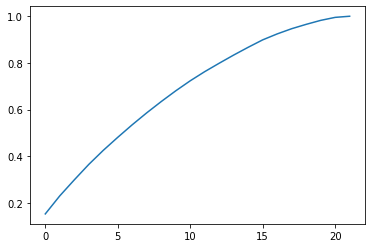

In [217]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [220]:
sum(pca.explained_variance_ratio_[:15])

0.8670604221011092

In [183]:
len(df_with_dummies.columns)

23

In [184]:
sum(df_with_dummies['ca_?'])

4

In [173]:
df_with_dummies.disease_presence.value_counts()

0    188
1    106
Name: disease_presence, dtype: int64

In [203]:
a = []
for i in range(100):
    

    data = df_with_dummies
    train = data.sample(n=30, random_state = i)

    X = train.iloc[:,1:]
    y = train.iloc[:,0]

    test = data.drop(train.index)
    X_test = test.iloc[:,1:]
    y_test = test.iloc[:,0]

    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X,y)

    a.append(sum(lr.predict(X_test) == y_test) / len(y_test))

In [191]:
b = []
for i in range(100):
    

    data = df_with_dummies
    train = data.sample(n=100, random_state = i)

    X = train.iloc[:,1:]
    y = train.iloc[:,0]

    test = data.drop(train.index)
    X_test = test.iloc[:,1:]
    y_test = test.iloc[:,0]

    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X,y)

    b.append(sum(lr.predict(X_test) == y_test) / len(y_test))

In [204]:
import numpy as np
np.mean(a)

0.7360805860805862

In [11]:
"""
    age: age in years
    sex: sex (1 = male; 0 = female)
    cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
    chol: serum cholestoral in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
    restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
    thalach: maximum heart rate achieved
    exang: exercise induced angina (1 = yes; 0 = no)
    oldpeak = ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
    ca: number of major vessels (0-3) colored by flourosopy
    thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    disease_presence:  integer valued from 0 (no presence) to 4
"""

"\n    age: age in years\n    sex: sex (1 = male; 0 = female)\n    cp: chest pain type\n        -- Value 1: typical angina\n        -- Value 2: atypical angina\n        -- Value 3: non-anginal pain\n        -- Value 4: asymptomatic\n    trestbps: resting blood pressure (in mm Hg on admission to the \n        hospital)\n    chol: serum cholestoral in mg/dl\n    fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)\n    restecg: resting electrocardiographic results\n        -- Value 0: normal\n        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST \n                    elevation or depression of > 0.05 mV)\n        -- Value 2: showing probable or definite left ventricular hypertrophy\n                    by Estes' criteria\n    thalach: maximum heart rate achieved\n    exang: exercise induced angina (1 = yes; 0 = no)\n    oldpeak = ST depression induced by exercise relative to rest\n    slope: the slope of the peak exercise ST segment\n        -- Value 1: u